## CSCI 470 Activities and Case Studies

1. For all activities, you are allowed to collaborate with a partner. 
1. For case studies, you should work individually and are **not** allowed to collaborate.

By filling out this notebook and submitting it, you acknowledge that you are aware of the above policies and are agreeing to comply with them.

Some considerations with regard to how these notebooks will be graded:

1. Cells in which "# YOUR CODE HERE" is found are the cells where your graded code should be written.
2. In order to test out or debug your code you may also create notebook cells or edit existing notebook cells other than "# YOUR CODE HERE". We actually highly recommend you do so to gain a better understanding of what is happening. However, during grading, **these changes are ignored**. 
3. You must ensure that all your code for the particular task is available in the cells that say "# YOUR CODE HERE"
4. Every cell that says "# YOUR CODE HERE" is followed by a "raise NotImplementedError". You need to remove that line. During grading, if an error occurs then you will lose points for your work in that section.
5. If your code passes the "assert" statements, then no output will result. If your code fails the "assert" statements, you will get an "AssertionError". Getting an assertion error means you will not receive points for that particular task.
6. If you edit the "assert" statements to make your code pass, they will still fail when they are graded since the autograder will ignore the modified "assert" statement. Make sure you don't edit the assert statements.
7. We may sometimes have "hidden" tests for grading. This means that passing the visible "assert" statements is not sufficient. The "assert" statements are there as a guide but you need to make sure you understand what you're required to do and ensure that you are doing it correctly. Passing the visible tests is necessary but not sufficient to get the grade for that cell.
8. When you are asked to define a function, make sure you **don't** use any variables outside of the parameters passed to the function. You can think of the parameters being passed to the function as a hint. Make sure you're using all of those variables.
9. The **Grading** section at the end of the document (before the **Feedback** section) contains some code for our autograder on GradeScope. You are expected to fail this block of code in your Jupyter environment. DO NOT edit this block of code, or you may not get points for your assignment.
10. Finally, **make sure you run "Kernel > Restart and Run All"** and pass all the asserts before submitting. If you don't restart the kernel, there may be some code that you ran and deleted that is still being used and that was why your asserts were passing.

# Deep Learning - Autoencoders

In this exercise we'll use an AutoEncoder to learn a dimenionally reduced representation of data and investigate its performance compared to using the original data. You'll learn how to build AutoEncoders and how to use the Keras functional API.

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model, Input
import sklearn as sk
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("ggplot")

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
data = load_breast_cancer()
features = data["data"]
targets = data["target"]
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0)

In [3]:
# Read through the description of the data to better understand it
# What features do we have and what is the target we're trying to predict?
print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
X_train.shape

(426, 30)

In [5]:
X_train

array([[1.185e+01, 1.746e+01, 7.554e+01, ..., 9.140e-02, 3.101e-01,
        7.007e-02],
       [1.122e+01, 1.986e+01, 7.194e+01, ..., 2.022e-02, 3.292e-01,
        6.522e-02],
       [2.013e+01, 2.825e+01, 1.312e+02, ..., 1.628e-01, 2.572e-01,
        6.637e-02],
       ...,
       [9.436e+00, 1.832e+01, 5.982e+01, ..., 5.052e-02, 2.454e-01,
        8.136e-02],
       [9.720e+00, 1.822e+01, 6.073e+01, ..., 0.000e+00, 1.909e-01,
        6.559e-02],
       [1.151e+01, 2.393e+01, 7.452e+01, ..., 9.653e-02, 2.112e-01,
        8.732e-02]])

In [6]:
y_train.shape

(426,)

In [7]:
y_train

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

### Building a Keras Model with the functional API

In this exercise, instead of using the `Sequential` model, we will use the base `Model` in `tf.keras`. There are two approaches to using `tf.keras.Model`. We will use the functional API as outlined in the [`Model` docs](https://www.tensorflow.org/api_docs/python/tf/keras/models/Model).

Note that unlike the manner in which we defined our model in the prior Activity, in this Activity (using the base Model) the definition is more like that of the coding of a functional algorithm, e.g.:

b = f1(a)  
c = f2(b)  
d = f3(c)  
etc.

Unlike traditional script execution in Python, however, those lines of code do not actually execute the computation at that moment. Rather, they are defining a chain of operations that our `Model` will execute later, when we ask it to.

### The architecture of your autoencoder

Below, you'll build an autoencoder with several layers. Recall that an encoder is composed of an "encoder" portion and a "decoder" portion. Your encoder will have two layers, transforming the number of features down to 10 in the first layer, and down to 5 (or less) in the second layer. The output of that second layer will serve as the encoded (or "embedded") representation, which will later be used as features for an SVM model. Your decoder will also have two layers, undoing the encoding, and transforming the encoded representation up to 10 in the first layer, and up to the original dimensionality in its second layer.

Your autoencoder model with thus have 4 layers of neurons. Some would call this a 5-layer model, considering the input samples as a "layer" as well, although that is not a layer of neurons.

In [20]:
# Determine the number of input dimensions (features) and use that value to
# create a tf.keras.Input object, giving it the variable name "inputs".
#
# Also, select a dimension (<=5) for the encoding/embedding (the number of
# neurons in the "middle" layer of your autoencoder) and give it the
# variable name "embedding_dim".

# YOUR CODE HERE
input_dim = 30
inputs = tf.keras.Input(shape=(input_dim,), name="inputs")
embedding_dim = 3

In [21]:
assert inputs.shape[1] == X_train.shape[1]
assert isinstance(embedding_dim, int)
assert embedding_dim > 0 and embedding_dim <= 5

In [22]:
# To start, you'll define the encoding portion of the autoencoder.
#
# Start with "inputs" and chain layer calls to two subsequent Dense layers,
# the first with 10 neurons (units), the second with "embedding_dim" neurons.
# See the tf.keras.Model documentation (linked in the instructional cell
# above). There is a brief example near the top of that webpage.
#
# Use ReLU as the activation function for the first Dense layer
# and do not set an activation for the second Dense layer.
#
# Name the output of the second Dense layer "encoded".

# YOUR CODE HERE
encoded = tf.keras.layers.Dense(10, activation='relu')(inputs)
encoded = tf.keras.layers.Dense(embedding_dim)(encoded)

In [24]:
testM = Model(inputs, encoded)
assert len(testM.layers) == 3
assert encoded.shape[1] == embedding_dim

In [25]:
# Now you'll define the decoding portion of the autoencoder.
#
# Chain layer calls to two more dense layers, the first with 10 neurons and the
# second (final layer) with the same number of neurons as your input (number
# of features).
#
# Use ReLU as the activation function for the first new Dense layer
# and do not set an activation for the second new Dense layer.
#
# Name the output of the final Dense layer "decoded".

# YOUR CODE HERE

decoded = tf.keras.layers.Dense(10, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(input_dim)(decoded)

In [26]:
testM = Model(inputs, decoded)
print(len(testM.layers))
assert len(testM.layers) == 5
assert decoded.shape[1] == 30

5


### Create the autoencoder

Above, you defined the encoder, decoder, and collectively the autoencoder. But we haven't actually instantiated any anything yet.

In the cell below, we'll create/instantiate your autoencoder for you, and also create a separate "encoder" object which shares its layers with the encoder portion of the autoencoder. This makes it easy for use to train the full autoencoder, and then use just the encoder portion to convert our original features into an embedded representation of lower dimensionality. We'll also create a separate "decoder" object in a similar manner.

In [27]:
# Create the autoencoder
autoencoder = Model(inputs, decoded)


# Create the encoder, which takes the same inputs as the
# autoencoder, but stops after the encoding layers. Thus,
# the output of the encoder is the encoded representation.
encoder = Model(inputs, encoded)


# Create the decoder which starts at the encoded output,
# and uses the remaining layers of the autoencoder...
encoded_embedding = Input(shape=(embedding_dim,))

# Get the 1st and 2nd decoder layer from the autoencoder
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]

# Chain layer calls
decoder_out = decoder_layer3(decoder_layer2(encoded_embedding))

# Create the decoder
decoder = Model(encoded_embedding, decoder_out)

In [28]:
# View the autoencoder architecture
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 10)                310       
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
 dense_2 (Dense)             (None, 10)                40        
                                                                 
 dense_3 (Dense)             (None, 30)                330       
                                                                 
Total params: 713 (2.79 KB)
Trainable params: 713 (2.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# View the encoder architecture
encoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 10)                310       
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 343 (1.34 KB)
Trainable params: 343 (1.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# View the decoder architecture
decoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_2 (Dense)             (None, 10)                40        
                                                                 
 dense_3 (Dense)             (None, 30)                330       
                                                                 
Total params: 370 (1.45 KB)
Trainable params: 370 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training

Below we'll compile and train the model. __Notice that in our call to `fit` we use `X_train` as both the features and the targets__. Our autoencoder is not a traditional machine learning model. It uses self-supervised learning, in which we want the output to equal the input. This might seem easy, but we are forcing the autoencoder model to compress the features down to a much lower dimensionality, in the bottlenecked autoencoder architecture. Thus, it may have to learn a complex non-linear function to accomplish this task.

Note that, as always, we do not use the test set features to train the autoencoder. Test set features are held out for all stages of training including dimensionality reduction.

We'll train for quite a while (1000 epochs). If all goes well, you'll see afterwards as to why we train for such a long time.

In [31]:
# Compile the model, using the Adam optimizer for gradient descent,
# and using MSE as the loss function.
autoencoder.compile(optimizer="adam", loss="mse")

# Train our model. Note that X_train serves as both features and targets.
n_epochs = 1000
history = autoencoder.fit(X_train, X_train, epochs=n_epochs)

Epoch 1/1000
14/14 [==============================] - 4s 3ms/step - loss: 53585.4883
Epoch 2/1000
14/14 [==============================] - 0s 3ms/step - loss: 51591.6250
Epoch 3/1000
14/14 [==============================] - 0s 3ms/step - loss: 49735.4453
Epoch 4/1000
14/14 [==============================] - 0s 8ms/step - loss: 47326.7188
Epoch 5/1000
14/14 [==============================] - 0s 4ms/step - loss: 43702.7461
Epoch 6/1000
14/14 [==============================] - 0s 3ms/step - loss: 39049.3086
Epoch 7/1000
14/14 [==============================] - 0s 3ms/step - loss: 33002.0039
Epoch 8/1000
14/14 [==============================] - 0s 6ms/step - loss: 25382.3066
Epoch 9/1000
14/14 [==============================] - 0s 5ms/step - loss: 17411.6152
Epoch 10/1000
14/14 [==============================] - 0s 4ms/step - loss: 10166.0049
Epoch 11/1000
14/14 [==============================] - 0s 3ms/step - loss: 5022.2090
Epoch 12/1000
14/14 [==============================] - 0s 4ms/st

14/14 [==============================] - 0s 2ms/step - loss: 436.8445
Epoch 99/1000
14/14 [==============================] - 0s 2ms/step - loss: 436.1702
Epoch 100/1000
14/14 [==============================] - 0s 3ms/step - loss: 438.6389
Epoch 101/1000
14/14 [==============================] - 0s 3ms/step - loss: 435.0380
Epoch 102/1000
14/14 [==============================] - 0s 2ms/step - loss: 431.8885
Epoch 103/1000
14/14 [==============================] - 0s 3ms/step - loss: 431.7739
Epoch 104/1000
14/14 [==============================] - 0s 3ms/step - loss: 431.2291
Epoch 105/1000
14/14 [==============================] - 0s 3ms/step - loss: 430.0383
Epoch 106/1000
14/14 [==============================] - 0s 3ms/step - loss: 430.2860
Epoch 107/1000
14/14 [==============================] - 0s 3ms/step - loss: 428.5063
Epoch 108/1000
14/14 [==============================] - 0s 4ms/step - loss: 428.1797
Epoch 109/1000
14/14 [==============================] - 0s 3ms/step - loss: 428.5

14/14 [==============================] - 0s 3ms/step - loss: 178.2038
Epoch 195/1000
14/14 [==============================] - 0s 3ms/step - loss: 175.8709
Epoch 196/1000
14/14 [==============================] - 0s 3ms/step - loss: 170.8673
Epoch 197/1000
14/14 [==============================] - 0s 3ms/step - loss: 165.2329
Epoch 198/1000
14/14 [==============================] - 0s 3ms/step - loss: 164.6562
Epoch 199/1000
14/14 [==============================] - 0s 3ms/step - loss: 160.1281
Epoch 200/1000
14/14 [==============================] - 0s 3ms/step - loss: 155.7611
Epoch 201/1000
14/14 [==============================] - 0s 3ms/step - loss: 154.9610
Epoch 202/1000
14/14 [==============================] - 0s 3ms/step - loss: 161.7591
Epoch 203/1000
14/14 [==============================] - 0s 3ms/step - loss: 144.6256
Epoch 204/1000
14/14 [==============================] - 0s 3ms/step - loss: 156.1820
Epoch 205/1000
14/14 [==============================] - 0s 3ms/step - loss: 139.

14/14 [==============================] - 0s 2ms/step - loss: 69.6180
Epoch 292/1000
14/14 [==============================] - 0s 2ms/step - loss: 66.4390
Epoch 293/1000
14/14 [==============================] - 0s 2ms/step - loss: 68.6039
Epoch 294/1000
14/14 [==============================] - 0s 2ms/step - loss: 70.5564
Epoch 295/1000
14/14 [==============================] - 0s 2ms/step - loss: 66.5080
Epoch 296/1000
14/14 [==============================] - 0s 3ms/step - loss: 67.0259
Epoch 297/1000
14/14 [==============================] - 0s 2ms/step - loss: 66.3923
Epoch 298/1000
14/14 [==============================] - 0s 3ms/step - loss: 66.9247
Epoch 299/1000
14/14 [==============================] - 0s 3ms/step - loss: 66.7812
Epoch 300/1000
14/14 [==============================] - 0s 3ms/step - loss: 64.9418
Epoch 301/1000
14/14 [==============================] - 0s 2ms/step - loss: 62.9107
Epoch 302/1000
14/14 [==============================] - 0s 3ms/step - loss: 67.6977
Epoch 3

14/14 [==============================] - 0s 3ms/step - loss: 41.5121
Epoch 389/1000
14/14 [==============================] - 0s 3ms/step - loss: 45.3706
Epoch 390/1000
14/14 [==============================] - 0s 3ms/step - loss: 41.2170
Epoch 391/1000
14/14 [==============================] - 0s 3ms/step - loss: 41.1346
Epoch 392/1000
14/14 [==============================] - 0s 3ms/step - loss: 42.8923
Epoch 393/1000
14/14 [==============================] - 0s 3ms/step - loss: 44.4497
Epoch 394/1000
14/14 [==============================] - 0s 3ms/step - loss: 41.1007
Epoch 395/1000
14/14 [==============================] - 0s 2ms/step - loss: 42.3143
Epoch 396/1000
14/14 [==============================] - 0s 3ms/step - loss: 41.2019
Epoch 397/1000
14/14 [==============================] - 0s 3ms/step - loss: 39.7369
Epoch 398/1000
14/14 [==============================] - 0s 3ms/step - loss: 39.9905
Epoch 399/1000
14/14 [==============================] - 0s 3ms/step - loss: 38.0982
Epoch 4

14/14 [==============================] - 0s 3ms/step - loss: 24.5353
Epoch 486/1000
14/14 [==============================] - 0s 3ms/step - loss: 24.4342
Epoch 487/1000
14/14 [==============================] - 0s 3ms/step - loss: 24.2008
Epoch 488/1000
14/14 [==============================] - 0s 3ms/step - loss: 24.7447
Epoch 489/1000
14/14 [==============================] - 0s 3ms/step - loss: 25.3124
Epoch 490/1000
14/14 [==============================] - 0s 3ms/step - loss: 24.6913
Epoch 491/1000
14/14 [==============================] - 0s 3ms/step - loss: 23.9943
Epoch 492/1000
14/14 [==============================] - 0s 3ms/step - loss: 23.9552
Epoch 493/1000
14/14 [==============================] - 0s 3ms/step - loss: 24.9742
Epoch 494/1000
14/14 [==============================] - 0s 3ms/step - loss: 24.5393
Epoch 495/1000
14/14 [==============================] - 0s 3ms/step - loss: 24.3099
Epoch 496/1000
14/14 [==============================] - 0s 2ms/step - loss: 24.2749
Epoch 4

14/14 [==============================] - 0s 3ms/step - loss: 23.7108
Epoch 583/1000
14/14 [==============================] - 0s 3ms/step - loss: 22.6980
Epoch 584/1000
14/14 [==============================] - 0s 3ms/step - loss: 22.5748
Epoch 585/1000
14/14 [==============================] - 0s 3ms/step - loss: 23.1021
Epoch 586/1000
14/14 [==============================] - 0s 3ms/step - loss: 24.0160
Epoch 587/1000
14/14 [==============================] - 0s 3ms/step - loss: 23.5071
Epoch 588/1000
14/14 [==============================] - 0s 3ms/step - loss: 22.8961
Epoch 589/1000
14/14 [==============================] - 0s 3ms/step - loss: 23.2445
Epoch 590/1000
14/14 [==============================] - 0s 3ms/step - loss: 22.6028
Epoch 591/1000
14/14 [==============================] - 0s 3ms/step - loss: 23.1367
Epoch 592/1000
14/14 [==============================] - 0s 2ms/step - loss: 22.7354
Epoch 593/1000
14/14 [==============================] - 0s 3ms/step - loss: 22.4205
Epoch 5

14/14 [==============================] - 0s 2ms/step - loss: 21.9820
Epoch 680/1000
14/14 [==============================] - 0s 3ms/step - loss: 21.9583
Epoch 681/1000
14/14 [==============================] - 0s 2ms/step - loss: 22.4168
Epoch 682/1000
14/14 [==============================] - 0s 4ms/step - loss: 22.5908
Epoch 683/1000
14/14 [==============================] - 0s 2ms/step - loss: 21.4342
Epoch 684/1000
14/14 [==============================] - 0s 2ms/step - loss: 21.5241
Epoch 685/1000
14/14 [==============================] - 0s 2ms/step - loss: 21.5812
Epoch 686/1000
14/14 [==============================] - 0s 2ms/step - loss: 21.3125
Epoch 687/1000
14/14 [==============================] - 0s 3ms/step - loss: 23.8524
Epoch 688/1000
14/14 [==============================] - 0s 2ms/step - loss: 21.9517
Epoch 689/1000
14/14 [==============================] - 0s 2ms/step - loss: 21.5768
Epoch 690/1000
14/14 [==============================] - 0s 3ms/step - loss: 21.6687
Epoch 6

14/14 [==============================] - 0s 3ms/step - loss: 20.9470
Epoch 777/1000
14/14 [==============================] - 0s 3ms/step - loss: 20.3580
Epoch 778/1000
14/14 [==============================] - 0s 3ms/step - loss: 19.8136
Epoch 779/1000
14/14 [==============================] - 0s 3ms/step - loss: 20.8324
Epoch 780/1000
14/14 [==============================] - 0s 2ms/step - loss: 20.4569
Epoch 781/1000
14/14 [==============================] - 0s 3ms/step - loss: 20.0360
Epoch 782/1000
14/14 [==============================] - 0s 2ms/step - loss: 20.4759
Epoch 783/1000
14/14 [==============================] - 0s 3ms/step - loss: 20.9898
Epoch 784/1000
14/14 [==============================] - 0s 3ms/step - loss: 20.5308
Epoch 785/1000
14/14 [==============================] - 0s 3ms/step - loss: 20.3658
Epoch 786/1000
14/14 [==============================] - 0s 3ms/step - loss: 19.8720
Epoch 787/1000
14/14 [==============================] - 0s 3ms/step - loss: 20.1015
Epoch 7

14/14 [==============================] - 0s 3ms/step - loss: 19.5516
Epoch 874/1000
14/14 [==============================] - 0s 3ms/step - loss: 19.4825
Epoch 875/1000
14/14 [==============================] - 0s 3ms/step - loss: 18.9027
Epoch 876/1000
14/14 [==============================] - 0s 2ms/step - loss: 19.1487
Epoch 877/1000
14/14 [==============================] - 0s 3ms/step - loss: 19.2901
Epoch 878/1000
14/14 [==============================] - 0s 3ms/step - loss: 20.2299
Epoch 879/1000
14/14 [==============================] - 0s 3ms/step - loss: 19.0589
Epoch 880/1000
14/14 [==============================] - 0s 4ms/step - loss: 18.7592
Epoch 881/1000
14/14 [==============================] - 0s 4ms/step - loss: 19.2241
Epoch 882/1000
14/14 [==============================] - 0s 3ms/step - loss: 19.2626
Epoch 883/1000
14/14 [==============================] - 0s 3ms/step - loss: 19.3556
Epoch 884/1000
14/14 [==============================] - 0s 3ms/step - loss: 19.2308
Epoch 8

14/14 [==============================] - 0s 3ms/step - loss: 18.6375
Epoch 971/1000
14/14 [==============================] - 0s 1ms/step - loss: 18.8050
Epoch 972/1000
14/14 [==============================] - 0s 2ms/step - loss: 17.7865
Epoch 973/1000
14/14 [==============================] - 0s 2ms/step - loss: 17.6425
Epoch 974/1000
14/14 [==============================] - 0s 2ms/step - loss: 18.7585
Epoch 975/1000
14/14 [==============================] - 0s 2ms/step - loss: 18.4162
Epoch 976/1000
14/14 [==============================] - 0s 3ms/step - loss: 17.9811
Epoch 977/1000
14/14 [==============================] - 0s 2ms/step - loss: 18.1118
Epoch 978/1000
14/14 [==============================] - 0s 2ms/step - loss: 18.4617
Epoch 979/1000
14/14 [==============================] - 0s 2ms/step - loss: 20.0301
Epoch 980/1000
14/14 [==============================] - 0s 2ms/step - loss: 18.1782
Epoch 981/1000
14/14 [==============================] - 0s 2ms/step - loss: 17.8776
Epoch 9

Loss on the final training epoch was 17.60


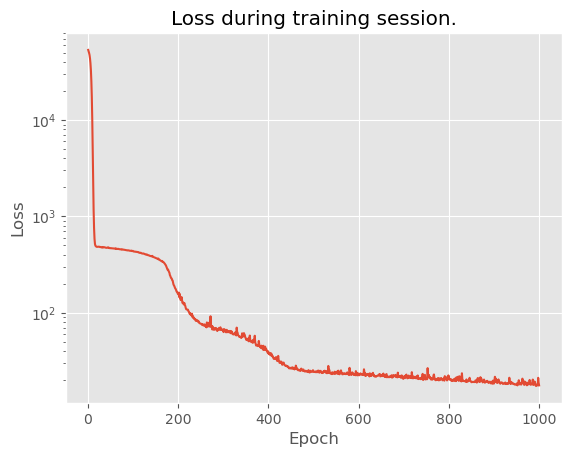

In [32]:
# Let's look at our the loss scores collected during the training/fit session above.

plt.semilogy(np.arange(1, n_epochs+1), history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss during training session.')

print(f"Loss on the final training epoch was {history.history['loss'][-1]:0.2f}")

### Training convergence

If everthing went as planned, you'll see a somewhat chaotic, stairstep-shapped loss curve in the figure above. During training, the model parameters sometimes got stuck in or a near a local minimum of the loss function, which is why you see some flatter portions even during the early training epochs. Fortunately the learning procedure found a way out of those local minima.

### Embedding

Now that you've trained the autoencoder, and given yourself direct access to the encoder half of the autoencoder, we'll use that encoder (below) to "embed" the original features into a new feature/embedding space. The resulting new features are typically called "embedded" or "encoded" features.

In [33]:
# Calculate the embedded features using the encoder model
X_train_embed = encoder.predict(X_train)
X_test_embed = encoder.predict(X_test)

5/5 [==============================] - 0s 2ms/step


### Supervised Learning

Now comes the actual training of a supervised learning model. We have our embedded features, thanks to our autoencoder, along with our original features.

__You'll train two SVM models to predict breast cancer diagnoses: malignant or benign.__  
One SVM will use the original features and one will use the embedded features.  
Which do you think well make better test set predictions?

You may experience some `ConvergenceWarning` messages. That's okay, you can ignore them.

In [41]:
# Train two LinearSVC models
#
# Create and fit a model with the original features.
# Name the model "base_model".
#
# Create and fit a model with autoencoder-embedded features.
# Name the model "embed_model".
#
# When you create your LinearSVC models, you may want to
# set random_seed to the same values (e.g., 0) for both models
# for a more apples-to-apples comparison.

# YOUR CODE HERE

random_seed = 0

base_model = LinearSVC(random_state=random_seed)
base_model.fit(X_train, y_train)

embed_model = LinearSVC(random_state=random_seed)
embed_model.fit(X_train_embed, y_train)

C:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\anast\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0)

In [42]:
assert base_model
assert isinstance(base_model, LinearSVC)
assert base_model.coef_.shape[1] == 30
assert embed_model
assert isinstance(embed_model, LinearSVC)
assert embed_model.coef_.shape[1] == embedding_dim

In [43]:
print(f"The base SVM accuracy score:                  {base_model.score(X_test, y_test):0.3f}")
print(f"The autoencoder embedding SVM accuracy score: {embed_model.score(X_test_embed, y_test):0.3f}")

The base SVM accuracy score:                  0.902
The autoencoder embedding SVM accuracy score: 0.916


### Parting thoughts

Was the test set score of the embedded data model better or worse than that of the original data model?

Ask youself why it might be better or worse. 

 - What happens when you change the activation function(s) in the autoencoder?
 - What happens when you change the embedding_dim to be larger or smaller?
 - Is it sufficient to just use LinearSVC with the default parameters to make any of these conclusions?

# Grading
The following code block is purely used for grading. If you find any error, you can ignore. DO NOT MODIFY THE CODE BLOCK BELOW.

In [46]:
# Autograding with Otter Grader
import otter
grader = otter.Notebook()
grader.check_all()

ModuleNotFoundError: No module named 'otter'

## Feedback

In [45]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    return "no feedback"